In [27]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [28]:
# Sample dataset
np.random.seed(42)
n = 200
categories = ['Photography', 'Music', 'Health', 'Productivity', 'Finance', 'Education', 'Game', 'Tools']
data = {
    'App': [f'App{i}' for i in range(n)],
    'Category': np.random.choice(categories, size=n),
    'Type': np.random.choice(['Free', 'Paid'], size=n, p=[0.5, 0.5]),
    'Installs': np.random.randint(1000, 200000, size=n),
    'Price': np.round(np.random.uniform(0.99, 49.99, size=n), 2)
}

In [29]:
df = pd.DataFrame(data)
df['Revenue'] = df['Price'] * df['Installs']


In [30]:
# Filter for paid apps
paid_apps = df[df['Type'] == 'Paid']

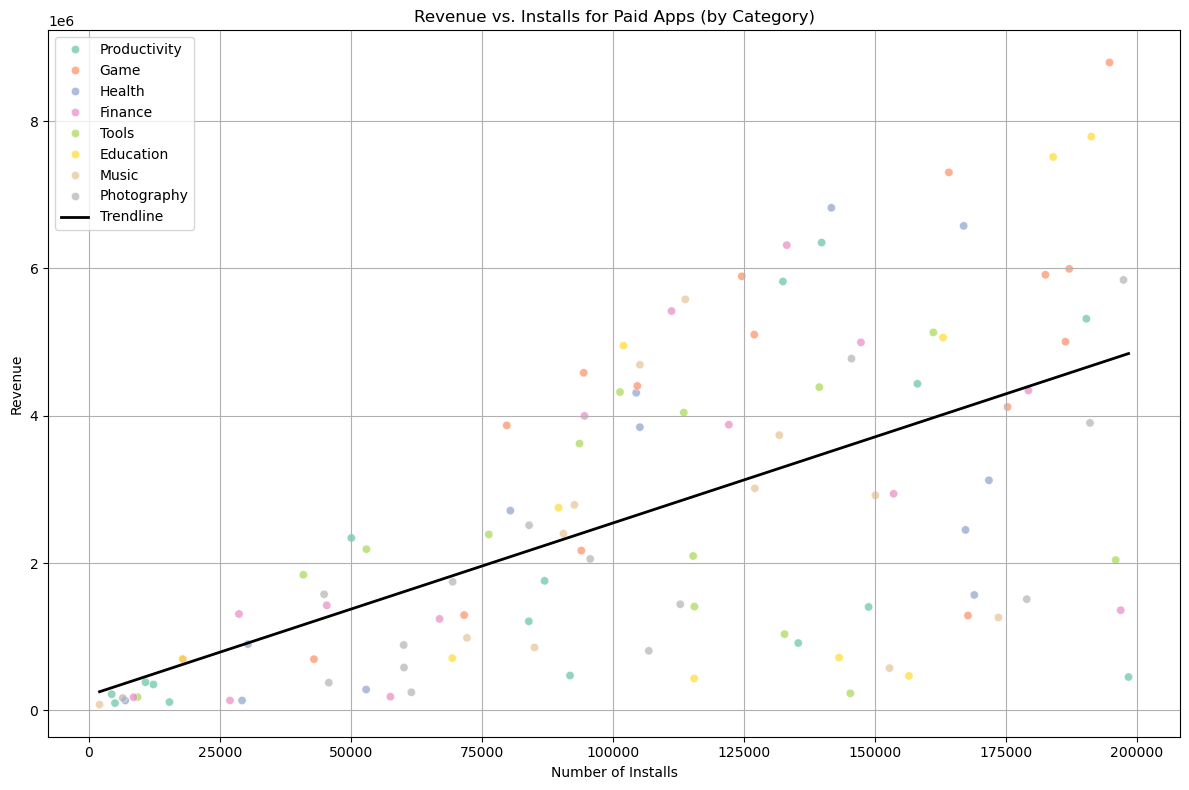

In [34]:
# Scatter plot with trendline
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=paid_apps,
    x='Installs',
    y='Revenue',
    hue='Category',
    palette='Set2',
    alpha=0.7
)

# Trendline 
X = paid_apps[['Installs']]
y = paid_apps['Revenue']
model = LinearRegression().fit(X, y)
trendline = model.predict(X)
sorted_idx = paid_apps['Installs'].argsort()
plt.plot(paid_apps['Installs'].iloc[sorted_idx], trendline[sorted_idx], color='black', linewidth=2, label='Trendline')

plt.title('Revenue vs. Installs for Paid Apps (by Category)')
plt.xlabel('Number of Installs')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\shing\AppData\Local\Temp\ipykernel_17124\3827769343.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


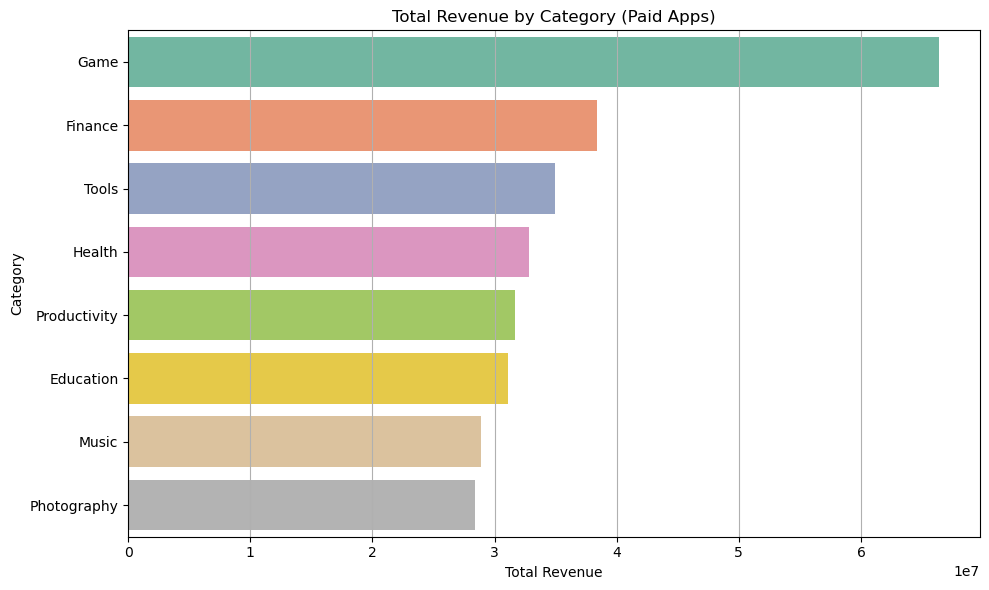

In [33]:
# Bar Plot: Total Revenue by Category
plt.figure(figsize=(10, 6))
category_revenue = paid_apps.groupby('Category')['Revenue'].sum().sort_values(ascending=False)

sns.barplot(
    x=category_revenue.values,
    y=category_revenue.index,
    palette='Set2'
)

plt.title('Total Revenue by Category (Paid Apps)')
plt.xlabel('Total Revenue')
plt.ylabel('Category')
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()